<h1>Kapitel 7 Hypotestest</h1>

In [20]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
from scipy.stats import t
from scipy.stats import norm
from statsmodels.stats import proportion
    
Customers, Major, Gig = None, None, None
with pd.ExcelFile(r"\\home.gu.gu.se\home-XS$\xsumat\Documents\ITHS\Data\Kap1.xlsx") as reader:
        Customers=pd.read_excel(reader, sheet_name='Customers')
        Major=pd.read_excel(reader, sheet_name='Major')
        Gig=pd.read_excel(reader, sheet_name='Gig')

In [21]:
Gig.head()

,EmployeeID,Wage,Industry,Job,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,32.81,Construction,Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,46.00,Automotive,Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,43.13,Construction,Sales Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,48.09,Automotive,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,43.62,Automotive,Accountant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Testa på 5% signifkansnivå om medellönen bland "Construction-arbetare" som också är "Sales Rep" är skild från 40 dollar</h3> 

<h3>Eftersom $\sigma$ är okänd ska vi använda t-test: $\frac{{\bar x}-\mu_0}{\frac{s}{\sqrt{n}}}$ </h3>

In [26]:
till_test=Gig[Gig['Industry'].isin(['Construction']) & Gig['Job'].isin(['Sales Rep'])][['Wage']]

<h3>Med tidigare kända funktioner</h3>

In [27]:
test_fun=(np.mean(till_test['Wage'])-40)/(np.std(till_test['Wage'],ddof=1)/np.sqrt(len(till_test['Wage'])))

In [28]:
test_fun

-2.387083417935383

In [29]:
p_värde=2*scs.t.cdf(test_fun,len(till_test['Wage'])-1)

p_värde

0.0201510838929895

<h3>Med test från Scipy.Stats</h3>

In [38]:
result=scs.ttest_1samp(till_test['Wage'],40)

result.statistic, result.pvalue

(-2.387083417935407, 0.02015108389298833)

<h3>Test om andelen "Construction-arbetare" är mindre än 70%</h3> 

In [39]:
Gig['Construction indicator']=(Gig['Industry'].isin(['Construction']))

<h3>Med kända funktioner</h3>

In [48]:
p_bar=np.sum(Gig['Construction indicator'])/len(Gig['Construction indicator'])

n=len(Gig['Construction indicator'])

test_fun=(p_bar-0.7)/np.sqrt(0.7*0.3/n)

p_bar,test_fun,n

(0.6059602649006622, -5.043362896228959, 604)

In [41]:
p_val=norm.cdf(test_fun)

p_val

2.2871027619645223e-07

<h3>Med Statsmodels</h3>

In [50]:
proportion.proportions_ztest(np.sum(Gig['Construction indicator']),len(Gig['Construction indicator']),value=0.70,prop_var=0.70)

(-5.043362896228959, 4.5742055239290446e-07)

<h3>p-värdet i dekan-exemplet på ppt</h3>

In [19]:
2*(1-scs.t.cdf(1.9444, df=34))

0.060158230326147866

<h3>Täthetsfunktioner för chi-2-fördelningar</h3>

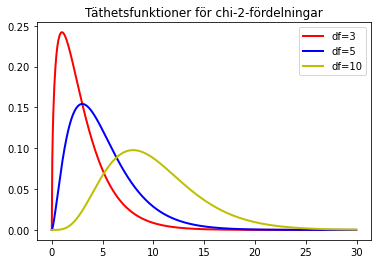

In [17]:
x = np.arange(0, 30, .05)
plt.plot(x, scs.chi2.pdf(x, df=3), color='r', lw=2)
plt.plot(x, scs.chi2.pdf(x, df=5), color='b', lw=2)
plt.plot(x, scs.chi2.pdf(x, df=10), color='y', lw=2)
plt.title('Täthetsfunktioner för chi-2-fördelningar')
plt.legend(['df=3','df=5','df=10'])
plt.show()

<h3>p-värdet i exemplet om populationsvarians på ppt</h3>

In [18]:
1-scs.chi2.cdf(10.5, df=9)

0.31154234056221153